In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import time
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
from matplotlib.lines import Line2D

Saving data.csv to data (1).csv


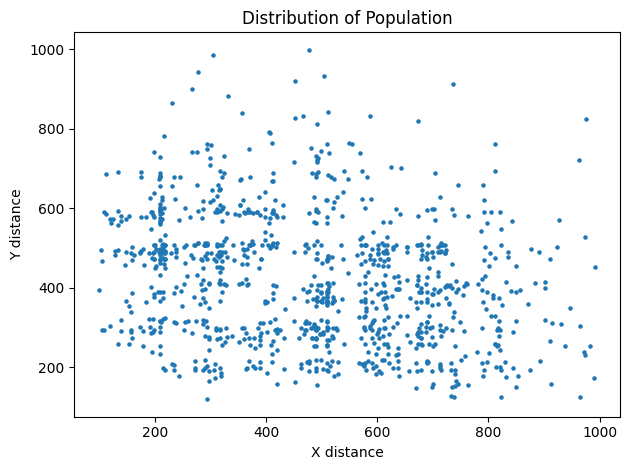

In [8]:
uploaded = files.upload()
data = pd.read_csv('data.csv')
np.random.seed(42)
plt.scatter(data['x'], data['y'], s=5)
plt.title('Distribution of Population')
plt.xlabel('X distance')
plt.ylabel('Y distance')
plt.tight_layout()
plt.show()

In [16]:
n_clusters = 11
start_time = time.time()
Z = sch.linkage(data[['x', 'y']], method='ward')
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg_clustering.fit_predict(data[['x', 'y']],)
end_time = time.time()
total_time_taken = end_time - start_time
print(f"Total time taken for hierarchical clustering: {total_time_taken:.4f} seconds")

unique_labels = set(labels)

Total time taken for hierarchical clustering: 0.0973 seconds


In [17]:
def buffered_hull(points, buffer_distance=0.05):
    if len(points) < 3:
        return Polygon(points).buffer(buffer_distance)
    hull = ConvexHull(points)
    poly_points = points[hull.vertices]
    polygon = Polygon(poly_points)
    return polygon.buffer(buffer_distance)

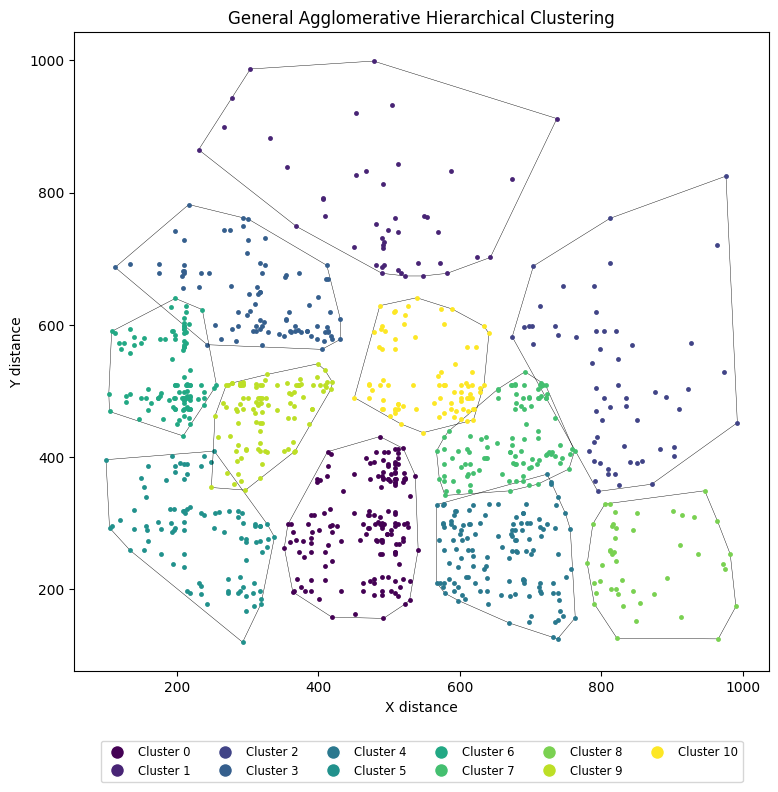

In [18]:
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(8, 8))
legend_elements = []

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = data[['x', 'y']].values[class_member_mask]
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=f'Cluster {k}'))

    if len(xy) > 2:
        hull_polygon = buffered_hull(xy)
        if hull_polygon.is_valid:
            x, y = hull_polygon.exterior.xy
            plt.plot(x, y, 'k-', linewidth=0.3)

    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col), markersize=7, markeredgewidth=0)



plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=6)
plt.title('General Agglomerative Hierarchical Clustering')
plt.xlabel('X distance')
plt.ylabel('Y distance')
plt.tight_layout()
plt.show()

In [20]:
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))
print_data = [f'Cluster {cluster}: {count} data points' for cluster, count in cluster_counts.items()]
max_lines = 4
formatted_output = [""] * max_lines
for i, line in enumerate(print_data):
    column_index = i // max_lines
    row_index = i % max_lines
    formatted_output[row_index] += f"{line:<30}"
print("\nDATA POINTS PER CLUSTER:")
for line in formatted_output:
    print(line)


DATA POINTS PER CLUSTER:
Cluster 0: 161 data points    Cluster 4: 127 data points    Cluster 8: 45 data points     
Cluster 1: 45 data points     Cluster 5: 95 data points     Cluster 9: 102 data points    
Cluster 2: 59 data points     Cluster 6: 104 data points    Cluster 10: 85 data points    
Cluster 3: 87 data points     Cluster 7: 104 data points    
